In [1]:
#Importing Libraries
import pandas as pd
import random
import pickle
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten,BatchNormalization, Dropout, Lambda, Conv2D, MaxPool2D, InputLayer
from tensorflow.keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.preprocessing import LabelEncoder
import random 

random.seed(19)

In [2]:
pickle_in = open('X.pickle',"rb")
X = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open('y.pickle',"rb")
y = pickle.load(pickle_in)
pickle_in.close()

In [3]:
X.shape[1:]

(64, 64, 1)

## Creating a model to be trained on gray-scaled, unnormalised data

In [4]:
# Define the model
model = Sequential()

# Add InputLayer with input shape
model.add(InputLayer(shape=X.shape[1:]))

# 1st Convolutional Layer
model.add(Conv2D(128, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model.add(Conv2D(64, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# 3rd Convolutional Layer
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# 4th Convolutional Layer
model.add(Conv2D(16, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Fully Connected Dense Layer
model.add(Dense(512, activation='relu'))

# Dropout Layer
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(32, activation='softmax'))

# Compile the model
# tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer="Adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 128)    │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 16)       │         8,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │        16,416 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,320 (1.23 MB)

 Trainable params: 322,320 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the model
history = model.fit(X, y, epochs=30, validation_split=0.15, batch_size=64) 

Epoch 1/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 193ms/step - accuracy: 0.0569 - loss: 8.3140 - val_accuracy: 0.0966 - val_loss: 3.2683
Epoch 2/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 182ms/step - accuracy: 0.1345 - loss: 3.1662 - val_accuracy: 0.5011 - val_loss: 2.2730
Epoch 3/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 198ms/step - accuracy: 0.4835 - loss: 2.0036 - val_accuracy: 0.7770 - val_loss: 0.8205
Epoch 4/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 185ms/step - accuracy: 0.7369 - loss: 0.9279 - val_accuracy: 0.8552 - val_loss: 0.5830
Epoch 5/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 186ms/step - accuracy: 0.7981 - loss: 0.6890 - val_accuracy: 0.9080 - val_loss: 0.3702
Epoch 6/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 184ms/step - accuracy: 0.8787 - loss: 0.4204 - val_accuracy: 0.9126 - val_loss: 0.3186
Epoch 7/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 189ms/step - accuracy: 0.9079 - loss: 0.2908 - val_accuracy: 0.9356 - val_loss: 0.2374
Epoch 8/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 186ms/step - accuracy: 0.9421 - loss: 0.2194 - val_accuracy: 0.

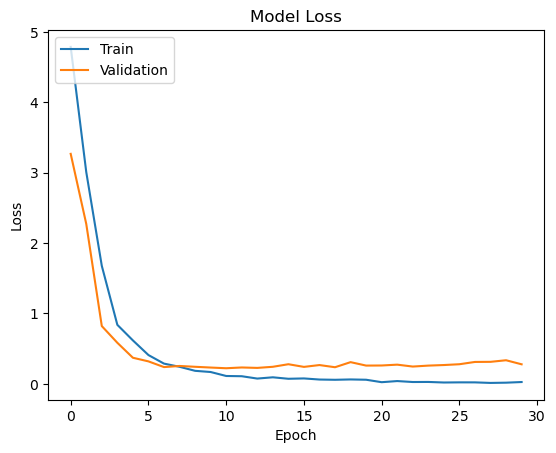

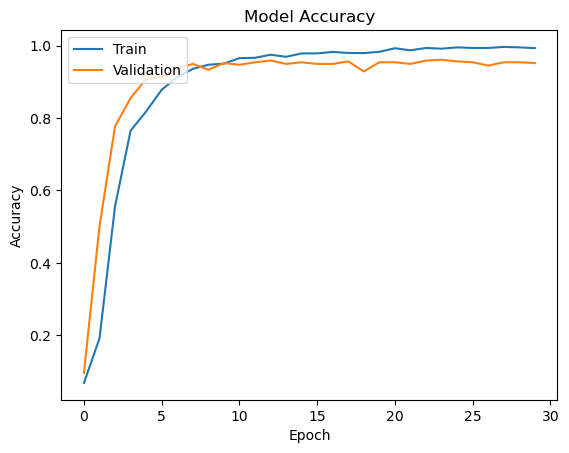

In [6]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [7]:
pickle_in = open('X_test.pickle',"rb")
X_test = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open('y_test.pickle',"rb")
y_test = pickle.load(pickle_in)
pickle_in.close()

In [8]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(X_test, y_test)

# Print the test loss and accuracy
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6254 - loss: 2.9304
Test Loss: 2.776259183883667
Test Accuracy: 0.6164772510528564


### Training the same Model on Normalised, gray-scaled Images

Using simple rescaling of Images.

This method involves rescaling pixel values to a new range, typically between 0 and 1. By dividing each pixel by the maximum possible value (usually 255), we can achieve this form of normalization which helps in scaling down the pixel intensity for various computing purposes.

In [9]:
X = X/255.0
X

array([[[[0.11372549],
         [0.11764706],
         [0.11372549],
         ...,
         [0.07058824],
         [0.07058824],
         [0.0745098 ]],

        [[0.10588235],
         [0.10980392],
         [0.10196078],
         ...,
         [0.03921569],
         [0.05098039],
         [0.07058824]],

        [[0.10980392],
         [0.09803922],
         [0.09803922],
         ...,
         [0.12156863],
         [0.03137255],
         [0.07058824]],

        ...,

        [[0.10196078],
         [0.29019608],
         [0.3372549 ],
         ...,
         [0.11764706],
         [0.14901961],
         [0.14901961]],

        [[0.12941176],
         [0.08235294],
         [0.10588235],
         ...,
         [0.12941176],
         [0.14117647],
         [0.14117647]],

        [[0.14509804],
         [0.12941176],
         [0.12156863],
         ...,
         [0.14509804],
         [0.14117647],
         [0.13333333]]],


       [[[0.62352941],
         [0.61568627],
         [0.63

In [10]:
X_test = X_test/255.0
X_test

array([[[[0.64313725],
         [0.64313725],
         [0.63921569],
         ...,
         [0.30588235],
         [0.34901961],
         [0.56470588]],

        [[0.64313725],
         [0.64313725],
         [0.64705882],
         ...,
         [0.31764706],
         [0.3372549 ],
         [0.55686275]],

        [[0.63921569],
         [0.64313725],
         [0.64313725],
         ...,
         [0.31764706],
         [0.32156863],
         [0.54509804]],

        ...,

        [[0.09019608],
         [0.09019608],
         [0.09019608],
         ...,
         [0.29019608],
         [0.10196078],
         [0.16470588]],

        [[0.09411765],
         [0.09019608],
         [0.08627451],
         ...,
         [0.2745098 ],
         [0.11764706],
         [0.16078431]],

        [[0.09411765],
         [0.08627451],
         [0.09411765],
         ...,
         [0.23921569],
         [0.11372549],
         [0.1372549 ]]],


       [[[0.17254902],
         [0.17254902],
         [0.17

In [11]:
# Define the model
model = Sequential()

# Add InputLayer with input shape
model.add(InputLayer(shape=X.shape[1:]))

# 1st Convolutional Layer
model.add(Conv2D(128, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model.add(Conv2D(64, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# 3rd Convolutional Layer
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# 4th Convolutional Layer
model.add(Conv2D(16, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Fully Connected Dense Layer
model.add(Dense(512, activation='relu'))

# Dropout Layer
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(32, activation='softmax'))

# Compile the model
# tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer="Adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 128)    │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 32)     │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 16)       │         8,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │        16,416 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,320 (1.23 MB)

 Trainable params: 322,320 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Train the model
history = model.fit(X, y, epochs=30, validation_split=0.15, batch_size=64) 

Epoch 1/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 196ms/step - accuracy: 0.0644 - loss: 3.3975 - val_accuracy: 0.0805 - val_loss: 3.2332
Epoch 2/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 185ms/step - accuracy: 0.2201 - loss: 2.9519 - val_accuracy: 0.7609 - val_loss: 1.0923
Epoch 3/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 186ms/step - accuracy: 0.7049 - loss: 1.1033 - val_accuracy: 0.9126 - val_loss: 0.4624
Epoch 4/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 183ms/step - accuracy: 0.8498 - loss: 0.5415 - val_accuracy: 0.9264 - val_loss: 0.3075
Epoch 5/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 186ms/step - accuracy: 0.8944 - loss: 0.3537 - val_accuracy: 0.9379 - val_loss: 0.2597
Epoch 6/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 187ms/step - accuracy: 0.9292 - loss: 0.2371 - val_accuracy: 0.9517 - val_loss: 0.2242
Epoch 7/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 185ms/step - accuracy: 0.9557 - loss: 0.1563 - val_accuracy: 0.9494 - val_loss: 0.2283
Epoch 8/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 188ms/step - accuracy: 0.9624 - loss: 0.1252 - val_accuracy: 0.

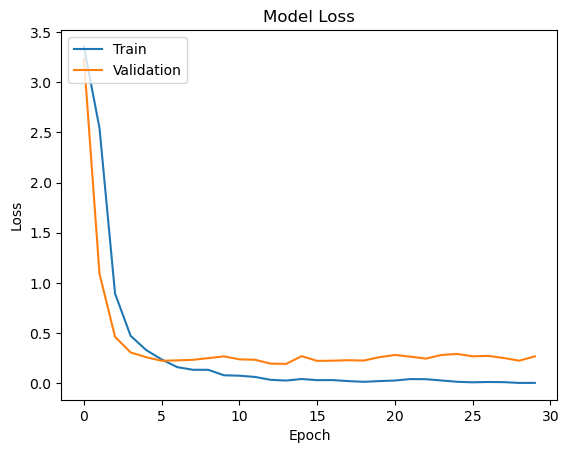

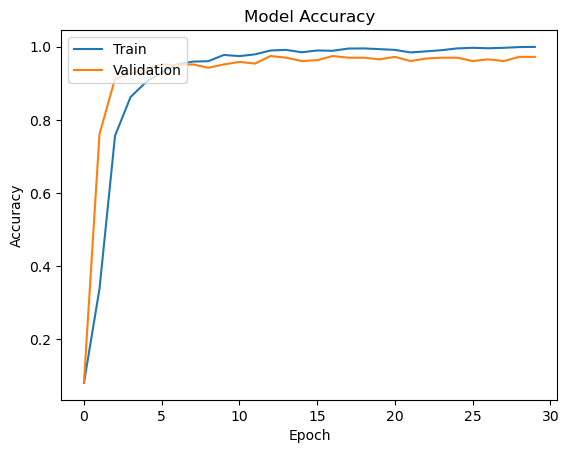

In [13]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [14]:
pickle_in = open('X_test.pickle',"rb")
X_test = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open('y_test.pickle',"rb")
y_test = pickle.load(pickle_in)
pickle_in.close()

In [15]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(X_test, y_test)

# Print the test loss and accuracy
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6770 - loss: 532.4576
Test Loss: 549.9581298828125
Test Accuracy: 0.6676136255264282


### Colored, normalised Image data.

In [16]:
pickle_in = open('X_color.pickle',"rb")
X_color = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open('y_color.pickle',"rb")
y_color = pickle.load(pickle_in)
pickle_in.close()

In [17]:
pickle_in = open('X_test_color.pickle',"rb")
X_test_color = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open('y_test_color.pickle',"rb")
y_test_color = pickle.load(pickle_in)
pickle_in.close()

In [18]:
X_color.shape[1:]

(64, 64, 3)

In [19]:
X_color = X_color/255.0
X_color

array([[[[0.11372549, 0.10980392, 0.1254902 ],
         [0.12156863, 0.11372549, 0.13333333],
         [0.11764706, 0.10980392, 0.12156863],
         ...,
         [0.07058824, 0.06666667, 0.07843137],
         [0.0745098 , 0.06666667, 0.08235294],
         [0.07843137, 0.07058824, 0.07843137]],

        [[0.10980392, 0.10196078, 0.11764706],
         [0.10980392, 0.10588235, 0.1254902 ],
         [0.10196078, 0.09803922, 0.11372549],
         ...,
         [0.04313725, 0.03529412, 0.05098039],
         [0.05490196, 0.04705882, 0.0627451 ],
         [0.0745098 , 0.06666667, 0.08235294]],

        [[0.11372549, 0.10588235, 0.12156863],
         [0.10196078, 0.09411765, 0.11372549],
         [0.09803922, 0.09411765, 0.11372549],
         ...,
         [0.12156863, 0.11764706, 0.14117647],
         [0.03137255, 0.02745098, 0.04705882],
         [0.07058824, 0.06666667, 0.08627451]],

        ...,

        [[0.07843137, 0.10588235, 0.14117647],
         [0.24705882, 0.29803922, 0.34509804]

In [20]:
X_test_color = X_test_color/255.0
X_test_color

array([[[[0.62745098, 0.64705882, 0.65882353],
         [0.62745098, 0.64705882, 0.65882353],
         [0.62352941, 0.64313725, 0.65490196],
         ...,
         [0.28235294, 0.30980392, 0.34117647],
         [0.3372549 , 0.34901961, 0.37647059],
         [0.56078431, 0.56470588, 0.58039216]],

        [[0.62745098, 0.64705882, 0.65882353],
         [0.62745098, 0.64705882, 0.65882353],
         [0.63137255, 0.65098039, 0.6627451 ],
         ...,
         [0.29019608, 0.3254902 , 0.35686275],
         [0.32941176, 0.3372549 , 0.36078431],
         [0.54901961, 0.55686275, 0.57254902]],

        [[0.62352941, 0.64313725, 0.65490196],
         [0.62745098, 0.64705882, 0.65882353],
         [0.62745098, 0.64705882, 0.65882353],
         ...,
         [0.29019608, 0.3254902 , 0.36078431],
         [0.30980392, 0.3254902 , 0.34117647],
         [0.52941176, 0.54901961, 0.56470588]],

        ...,

        [[0.0745098 , 0.09411765, 0.09019608],
         [0.05882353, 0.10196078, 0.09019608]

In [21]:
# Define the color model
model_color = Sequential()

# Add InputLayer with input shape
model_color.add(InputLayer(shape=X_color.shape[1:]))

# 1st Convolutional Layer
model_color.add(Conv2D(128, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model_color.add(MaxPool2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model_color.add(Conv2D(64, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model_color.add(MaxPool2D(pool_size=(2, 2)))

# 3rd Convolutional Layer
model_color.add(Conv2D(32, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model_color.add(MaxPool2D(pool_size=(2, 2)))

# 4th Convolutional Layer
model_color.add(Conv2D(16, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model_color.add(MaxPool2D(pool_size=(2, 2)))

# Flatten layer
model_color.add(Flatten())

# Fully Connected Dense Layer
model_color.add(Dense(512, activation='relu'))

# Dropout Layer
model_color.add(Dropout(0.5))

# Output Layer
model_color.add(Dense(32, activation='softmax'))

# Compile the model
# tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_color.compile(optimizer="Adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model_color.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 128)    │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 64)     │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 32)     │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 16)       │         8,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │        16,416 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 326,416 (1.25 MB)

 Trainable params: 326,416 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Train the model
history = model_color.fit(X_color, y_color, epochs=30, validation_split=0.15,batch_size=64) 

Epoch 1/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 187ms/step - accuracy: 0.0893 - loss: 3.3124 - val_accuracy: 0.3241 - val_loss: 2.5691
Epoch 2/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 182ms/step - accuracy: 0.3332 - loss: 2.2978 - val_accuracy: 0.6897 - val_loss: 1.0305
Epoch 3/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 182ms/step - accuracy: 0.6503 - loss: 1.0867 - val_accuracy: 0.7908 - val_loss: 0.5979
Epoch 4/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 180ms/step - accuracy: 0.7965 - loss: 0.5866 - val_accuracy: 0.8736 - val_loss: 0.4024
Epoch 5/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 185ms/step - accuracy: 0.8530 - loss: 0.4471 - val_accuracy: 0.9218 - val_loss: 0.2949
Epoch 6/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 187ms/step - accuracy: 0.8785 - loss: 0.3330 - val_accuracy: 0.8920 - val_loss: 0.3016
Epoch 7/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 187ms/step - accuracy: 0.8935 - loss: 0.2961 - val_accuracy: 0.9402 - val_loss: 0.1897
Epoch 8/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 181ms/step - accuracy: 0.9371 - loss: 0.1836 - val_accuracy: 0.

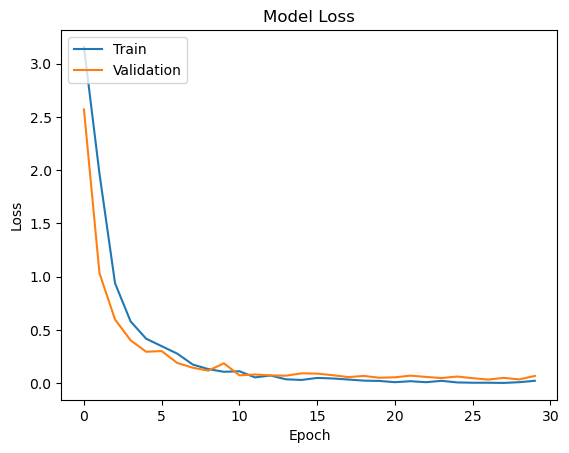

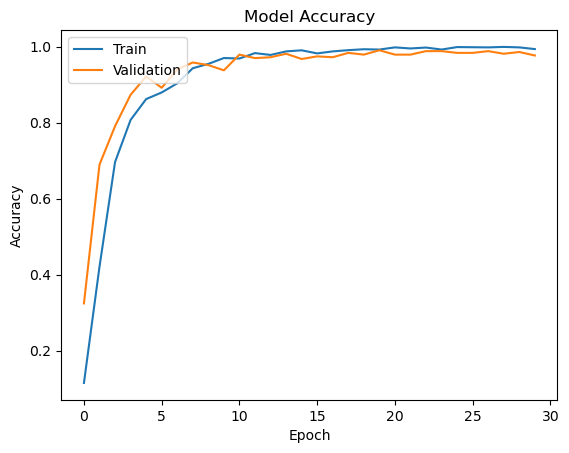

In [23]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [24]:
# Evaluate the model on the test dataset
loss, accuracy = model_color.evaluate(X_test_color, y_test_color)

# Print the test loss and accuracy
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6966 - loss: 2.1693
Test Loss: 1.8944859504699707
Test Accuracy: 0.71875


### Imrpoving performance with different optimisers

In [25]:
# Define the color model
model_color = Sequential()

# Add InputLayer with input shape
model_color.add(InputLayer(shape=X_color.shape[1:]))

# 1st Convolutional Layer
model_color.add(Conv2D(128, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model_color.add(MaxPool2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model_color.add(Conv2D(64, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model_color.add(MaxPool2D(pool_size=(2, 2)))

# 3rd Convolutional Layer
model_color.add(Conv2D(32, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model_color.add(MaxPool2D(pool_size=(2, 2)))

# 4th Convolutional Layer
model_color.add(Conv2D(16, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model_color.add(MaxPool2D(pool_size=(2, 2)))

# Flatten layer
model_color.add(Flatten())

# Fully Connected Dense Layer
model_color.add(Dense(512, activation='relu'))

# Dropout Layer
model_color.add(Dropout(0.5))

# Output Layer
model_color.add(Dense(32, activation='softmax'))

# Compile the model
# tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_color.compile(optimizer= tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model_color.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 64, 64, 128)    │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 64)     │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 32)     │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 8, 8, 16)       │         8,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │        16,416 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 326,416 (1.25 MB)

 Trainable params: 326,416 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Train the model
history = model_color.fit(X_color, y_color, epochs=30, validation_split=0.15,batch_size=64) 

Epoch 1/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step - accuracy: 0.0443 - loss: 3.4459 - val_accuracy: 0.1103 - val_loss: 3.3145
Epoch 2/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 176ms/step - accuracy: 0.1163 - loss: 3.2513 - val_accuracy: 0.2943 - val_loss: 2.6381
Epoch 3/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 172ms/step - accuracy: 0.2927 - loss: 2.4960 - val_accuracy: 0.5793 - val_loss: 1.5632
Epoch 4/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 178ms/step - accuracy: 0.6238 - loss: 1.2991 - val_accuracy: 0.8414 - val_loss: 0.5992
Epoch 5/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 173ms/step - accuracy: 0.7748 - loss: 0.7166 - val_accuracy: 0.8644 - val_loss: 0.4898
Epoch 6/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step - accuracy: 0.8525 - loss: 0.4905 - val_accuracy: 0.9080 - val_loss: 0.3126
Epoch 7/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 178ms/step - accuracy: 0.8955 - loss: 0.3589 - val_accuracy: 0.8920 - val_loss: 0.2958
Epoch 8/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 174ms/step - accuracy: 0.9005 - loss: 0.2983 - val_accuracy: 0.

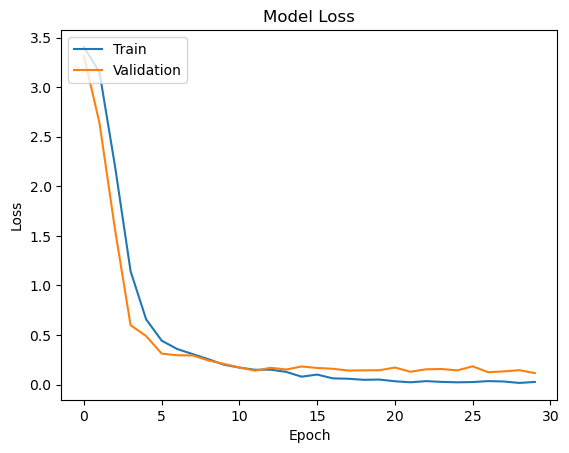

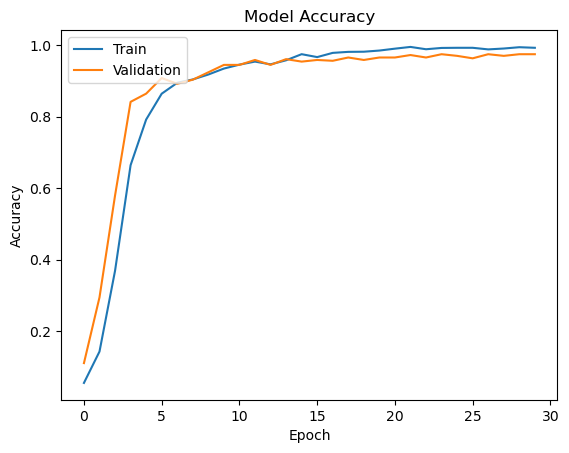

In [27]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [28]:
# Evaluate the model on the test dataset
loss, accuracy = model_color.evaluate(X_test_color, y_test_color)

# Print the test loss and accuracy
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7118 - loss: 1.6594
Test Loss: 1.6292475461959839
Test Accuracy: 0.7045454382896423


## RMSPROP Optimiser

In [29]:
# Define the color model
model_color = Sequential()

# Add InputLayer with input shape
model_color.add(InputLayer(shape=X_color.shape[1:]))

# 1st Convolutional Layer
model_color.add(Conv2D(128, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model_color.add(MaxPool2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model_color.add(Conv2D(64, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model_color.add(MaxPool2D(pool_size=(2, 2)))

# 3rd Convolutional Layer
model_color.add(Conv2D(32, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model_color.add(MaxPool2D(pool_size=(2, 2)))

# 4th Convolutional Layer
model_color.add(Conv2D(16, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model_color.add(MaxPool2D(pool_size=(2, 2)))

# Flatten layer
model_color.add(Flatten())

# Fully Connected Dense Layer
model_color.add(Dense(512, activation='relu'))

# Dropout Layer
model_color.add(Dropout(0.5))

# Output Layer
model_color.add(Dense(32, activation='softmax'))

# Compile the model
# tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_color.compile(optimizer= 'rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model_color.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 64, 64, 128)    │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 32, 32, 64)     │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 16, 16, 32)     │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 8, 8, 16)       │         8,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │        16,416 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 326,416 (1.25 MB)

 Trainable params: 326,416 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Train the model
history = model_color.fit(X_color, y_color, epochs=30, validation_split=0.15,batch_size=64) 

Epoch 1/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 181ms/step - accuracy: 0.0743 - loss: 3.3821 - val_accuracy: 0.2092 - val_loss: 2.8005
Epoch 2/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step - accuracy: 0.2450 - loss: 2.6715 - val_accuracy: 0.3586 - val_loss: 2.0924
Epoch 3/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 174ms/step - accuracy: 0.5254 - loss: 1.7640 - val_accuracy: 0.6828 - val_loss: 1.0416
Epoch 4/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 176ms/step - accuracy: 0.7024 - loss: 1.0104 - val_accuracy: 0.7908 - val_loss: 0.6585
Epoch 5/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 173ms/step - accuracy: 0.7700 - loss: 0.7158 - val_accuracy: 0.8299 - val_loss: 0.4640
Epoch 6/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 173ms/step - accuracy: 0.8243 - loss: 0.5609 - val_accuracy: 0.8897 - val_loss: 0.4141
Epoch 7/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 173ms/step - accuracy: 0.8500 - loss: 0.4398 - val_accuracy: 0.9149 - val_loss: 0.2690
Epoch 8/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 173ms/step - accuracy: 0.8745 - loss: 0.4211 - val_accuracy: 0.

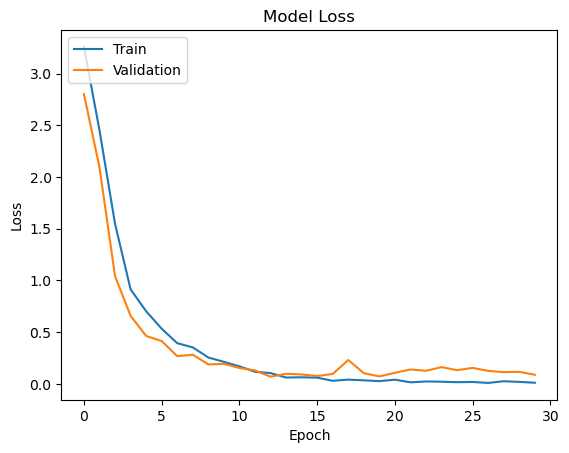

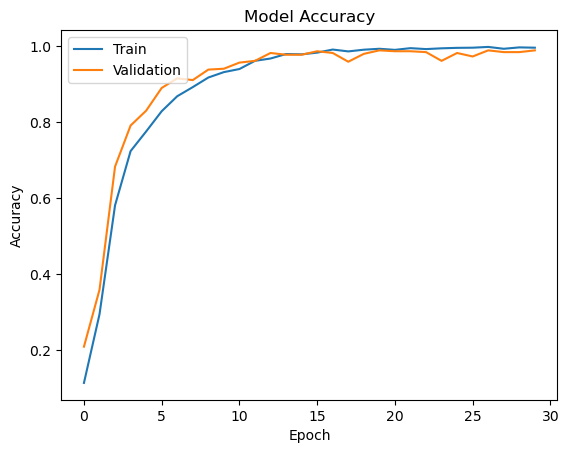

In [31]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [32]:
# Evaluate the model on the test dataset
loss, accuracy = model_color.evaluate(X_test_color, y_test_color)

# Print the test loss and accuracy
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7735 - loss: 1.8417
Test Loss: 1.5282267332077026
Test Accuracy: 0.7926136255264282


### Transfer Learning

In [41]:
from tensorflow.keras.applications import MobileNetV2

# Add an InputLayer to explicitly define the input shape
input_layer = InputLayer(input_shape=X_color.shape[1:])

# Load pre-trained MobileNetV2 model without top (fully connected) layers
base_model = MobileNetV2(input_shape=X_color.shape[1:], include_top=False, weights='imagenet')

# Set base model layers as non-trainable
for layer in base_model.layers:
    layer.trainable = False

# Define output layer with 32 units for 32 labels
output_layer = Dense(32, activation='softmax')

# Add output layer on top of MobileNetV2
model_color = tf.keras.Sequential([
    input_layer,  # InputLayer
    base_model, # Include MobileNetV2 as base model
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    output_layer  # Add output layer directly
])

# Compile the model
model_color.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model_color.summary()

C:\Users\hein_\AppData\Local\Temp\ipykernel_19720\4165706045.py:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=X_color.shape[1:], include_top=False, weights='imagenet')


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 2, 2, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 5120)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 512)            │     2,621,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │        16,416 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,896,352 (18.68 MB)

 Trainable params: 2,638,368 (10.06 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [42]:
# Train the model
history = model_color.fit(X_color, y_color, epochs=50, validation_split=0.15,batch_size=32) 

Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.5629 - loss: 2.0762 - val_accuracy: 0.8483 - val_loss: 0.6110
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.8700 - loss: 0.5159 - val_accuracy: 0.9172 - val_loss: 0.2971
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9083 - loss: 0.3280 - val_accuracy: 0.8966 - val_loss: 0.4366
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9186 - loss: 0.2588 - val_accuracy: 0.9057 - val_loss: 0.2874
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9325 - loss: 0.2455 - val_accuracy: 0.9195 - val_loss: 0.2832
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9423 - loss: 0.2086 - val_accuracy: 0.9333 - val_loss: 0.2592
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9421 - loss: 0.2112 - val_accuracy: 0.9057 - val_loss: 0.3103
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9647 - loss: 0.1384 - val_accuracy: 0.9195 - v

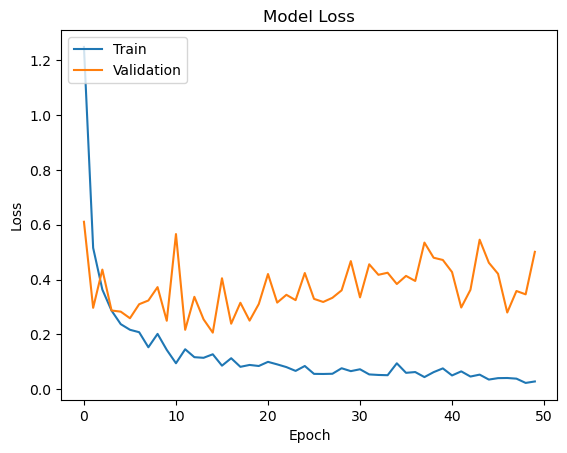

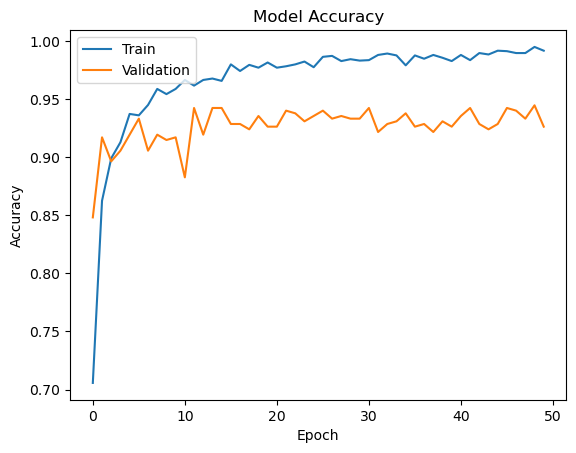

In [43]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [44]:
# Evaluate the model on the test dataset
loss, accuracy = model_color.evaluate(X_test_color, y_test_color)

# Print the test loss and accuracy
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7139 - loss: 3.1737
Test Loss: 3.1350812911987305
Test Accuracy: 0.7073863744735718
